# Importing Library 

In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten ,InputLayer ,BatchNormalization
import tensorflow as tf
from scipy import pi
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Mapping to deep learning problem

Clearly it is regression type problem. <br>
We have continous random variable as for y i.e. steering angle.<br>

# Getting image paths and Steering angle

X = Image paths <br>
Y = Steering angles in radians

In [2]:
X = []
Y = []
    
with open(os.path.join("driving_dataset", "data.txt")) as f:
    for line in f:
        image_name, angle = line.split()   
        image_path = os.path.join("driving_dataset", image_name)
        X.append(image_path)
        
        angle_radians = float(angle) * (pi / 180)  #converting angle into radians
        Y.append(angle_radians)
        

# Data Visualisation and Preprocessing

In [3]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X, Y , train_size = 0.8)

In [4]:
print(len(Xtrain))
print(len(Ytrain))
print(len(Xtest))
print(len(Ytest))
print(Xtrain[0:5])
print("-------------------")
print(Ytrain[0:5])

36324
36324
9082
9082
['driving_dataset\\28660.jpg', 'driving_dataset\\9428.jpg', 'driving_dataset\\7253.jpg', 'driving_dataset\\40984.jpg', 'driving_dataset\\7718.jpg']
-------------------
[-0.09512044423369097, -0.047472955654245766, -0.035255650890285456, 0.029845130209103034, 0.25342180738957665]


Steering angle -0.09512044423369097


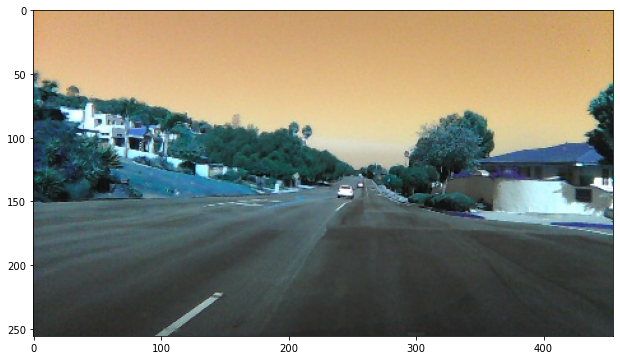

In [11]:
plt.figure(figsize =(12,6))
sample = cv2.imread(Xtrain[0]) 
plt.imshow(sample)
print("Steering angle", Ytrain[0])

Steering angle -0.09512044423369097


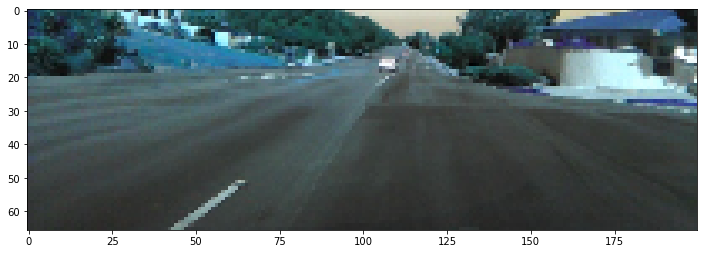

In [12]:
#We don't need top pixel to predict the steering angle
#hence we will remove it

plt.figure(figsize =(12,6))
sample = cv2.imread(Xtrain[0]) 
sample_road = sample[-150:]
sample_resize = cv2.resize(sample_road, (200, 66))
plt.imshow(sample_resize)

print("Steering angle", Ytrain[0])

In [5]:
#Here is the helper function which fetch the batch and load the image
#We will use batches so that RAM can handle data smoothly

array_pointer = 0
def helper_batch(batchsize):
    global array_pointer
    live_batch_X = list()
    live_batch_Y = list()
    
    for i in range(batchsize):
        read_image = cv2.imread(Xtrain[(array_pointer + i) % len(Xtrain)]) 
        read_image_road = read_image[-150:]
        read_image_resize = cv2.resize(read_image_road, (200, 66))
        read_image_final = read_image_resize/255.0 
        
        live_batch_X.append(read_image_final) 
        
        live_batch_Y.append(Ytrain[(array_pointer + i) % len(Ytrain)]) #appending corresponding labels
    array_pointer += batchsize
    
    return live_batch_X , live_batch_Y



# Conv Net Model

In [6]:
model = Sequential()
model.add(InputLayer(input_shape =(66, 200, 3)))
model.add(Conv2D(filters = 24, kernel_size= 5, strides=(2, 2), kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Conv2D(filters = 36, kernel_size= 5, strides=(2, 2), kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Conv2D(filters = 48, kernel_size= 5, strides=(2, 2), kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Conv2D(filters = 64, kernel_size= 3, strides=(1, 1), kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Conv2D(filters = 64, kernel_size= 3, strides=(1, 1), kernel_regularizer=l2(),bias_regularizer=l2())) 
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1152,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Dropout(0.2))
model.add(Dense(100,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Dropout(0.15))
model.add(Dense(50,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Dropout(0.1))
model.add(Dense(10,activation = "relu", kernel_regularizer=l2(),bias_regularizer=l2()))
model.add(Dense(1,activation = "linear", kernel_regularizer=l2(),bias_regularizer=l2()))
  
adam = tf.keras.optimizers.Adam(lr = 0.0001)

model.compile(optimizer = adam , loss= "mse" , metrics = ["mse"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 18, 64)         256       
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

# Training our ConvNet

In [7]:
epochs = 30
batchsize = 2000
for epoch in tqdm(range(epochs)):
    array_pointer = 0
    while array_pointer <= len(Xtrain):
        batch_X , batch_Y = helper_batch(batchsize)
        batch_X = np.array(batch_X)
        batch_Y = np.array(batch_Y)
        model.fit(batch_X, batch_Y,verbose = 1)

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 1s 13ms/step - loss: 3.5604 - mse: 0.1835


  3%|██▋                                                                             | 1/30 [02:20<1:08:06, 140.90s/it]

63/63 [==============================] - 1s 13ms/step - loss: 1.0807 - mse: 0.1401


  7%|█████▎                                                                          | 2/30 [04:30<1:02:36, 134.14s/it]

63/63 [==============================] - 1s 17ms/step - loss: 0.5708 - mse: 0.1347


 10%|████████▏                                                                         | 3/30 [06:38<59:11, 131.52s/it]

63/63 [==============================] - 1s 12ms/step - loss: 0.4021 - mse: 0.1382


 13%|██████████▉                                                                       | 4/30 [08:53<57:30, 132.72s/it]

63/63 [==============================] - 1s 15ms/step - loss: 0.3152 - mse: 0.1197


 17%|█████████████▋                                                                    | 5/30 [11:11<56:09, 134.78s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2823 - mse: 0.1169


 20%|████████████████▍                                                                 | 6/30 [13:51<57:15, 143.17s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2781 - mse: 0.1253


 23%|███████████████████▏                                                              | 7/30 [16:27<56:33, 147.55s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2567 - mse: 0.1120


 27%|█████████████████████▊                                                            | 8/30 [19:01<54:52, 149.66s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2486 - mse: 0.1057


 30%|████████████████████████▌                                                         | 9/30 [21:42<53:33, 153.01s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2403 - mse: 0.0983


 33%|███████████████████████████                                                      | 10/30 [24:18<51:18, 153.90s/it]

63/63 [==============================] - 1s 15ms/step - loss: 0.2366 - mse: 0.0993


 37%|█████████████████████████████▋                                                   | 11/30 [26:50<48:36, 153.48s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2413 - mse: 0.1041


 40%|████████████████████████████████▍                                                | 12/30 [29:16<45:17, 151.00s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2289 - mse: 0.0939


 43%|███████████████████████████████████                                              | 13/30 [31:44<42:33, 150.19s/it]

63/63 [==============================] - 1s 15ms/step - loss: 0.2216 - mse: 0.0856


 47%|█████████████████████████████████████▊                                           | 14/30 [34:13<39:56, 149.80s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2353 - mse: 0.0970


 50%|████████████████████████████████████████▌                                        | 15/30 [36:44<37:33, 150.24s/it]

63/63 [==============================] - 1s 15ms/step - loss: 0.2210 - mse: 0.0872


 53%|███████████████████████████████████████████▏                                     | 16/30 [39:17<35:15, 151.13s/it]

63/63 [==============================] - 1s 18ms/step - loss: 0.2169 - mse: 0.0827


 57%|█████████████████████████████████████████████▉                                   | 17/30 [41:55<33:10, 153.10s/it]

63/63 [==============================] - 1s 17ms/step - loss: 0.2128 - mse: 0.0789


 60%|████████████████████████████████████████████████▌                                | 18/30 [44:36<31:06, 155.56s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2158 - mse: 0.0803


 63%|███████████████████████████████████████████████████▎                             | 19/30 [47:15<28:41, 156.51s/it]

63/63 [==============================] - 1s 17ms/step - loss: 0.2121 - mse: 0.0774


 67%|██████████████████████████████████████████████████████                           | 20/30 [49:49<25:58, 155.85s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2171 - mse: 0.0856


 70%|████████████████████████████████████████████████████████▋                        | 21/30 [52:27<23:27, 156.37s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.2103 - mse: 0.0762


 73%|███████████████████████████████████████████████████████████▍                     | 22/30 [55:05<20:55, 157.00s/it]

63/63 [==============================] - 1s 16ms/step - loss: 0.2104 - mse: 0.0749


 77%|██████████████████████████████████████████████████████████████                   | 23/30 [57:45<18:24, 157.72s/it]

63/63 [==============================] - 1s 16ms/step - loss: 0.2157 - mse: 0.0827


 80%|███████████████████████████████████████████████████████████████▏               | 24/30 [1:00:27<15:55, 159.23s/it]

63/63 [==============================] - 1s 16ms/step - loss: 0.2024 - mse: 0.0706


 83%|█████████████████████████████████████████████████████████████████▊             | 25/30 [1:03:10<13:21, 160.23s/it]

63/63 [==============================] - 1s 15ms/step - loss: 0.2115 - mse: 0.0772


 87%|████████████████████████████████████████████████████████████████████▍          | 26/30 [1:05:48<10:38, 159.60s/it]

63/63 [==============================] - 1s 15ms/step - loss: 0.2029 - mse: 0.0710


 90%|███████████████████████████████████████████████████████████████████████        | 27/30 [1:08:30<08:00, 160.21s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.1994 - mse: 0.0687


 93%|█████████████████████████████████████████████████████████████████████████▋     | 28/30 [1:11:02<05:15, 157.94s/it]

63/63 [==============================] - 1s 14ms/step - loss: 0.1956 - mse: 0.0638


 97%|████████████████████████████████████████████████████████████████████████████▎  | 29/30 [1:13:36<02:36, 156.72s/it]

63/63 [==============================] - 1s 16ms/step - loss: 0.2007 - mse: 0.0690


100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [1:16:11<00:00, 152.38s/it]


In [8]:
model.save("driving_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach t

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

# Saving model locally and Testing 

In [2]:
xx = tf.keras.models.load_model("driving_model")

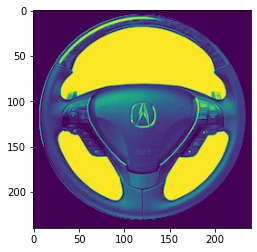

In [3]:
img_wheel = cv2.imread('steering_wheel_image.jpg', 0)
plt.imshow(img_wheel)

In [4]:
row , col = img_wheel.shape

In [7]:
tf.autograph.experimental.do_not_convert(
    func=None
)
i = 0
while cv2.waitKey(60) != ord("q"):
    image_path = X[i]
    image_array = cv2.imread(image_path)
    
    image_array_ = (cv2.resize(image_array[-150:],(200,66))/255.0).reshape((1,66,200,3))
    degrees = xx.predict(image_array_)[0][0]*180/pi
    
    #this function rotate the image by a given degrees.
    M = cv2.getRotationMatrix2D((col/2,row/2), -degrees, 1) 
    
     #warpAffine function applies rotation to the image
    dst = cv2.warpAffine(src = img_wheel, M = M, dsize = (col, row))
    cv2.imshow("Steering Wheel", dst)
    cv2.imshow("Frame Window",image_array)
    i += 1
cv2.destroyAllWindows() 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
